**This notebook is in Python 2.7**

In [3]:
!pip install pattern

    100% |████████████████████████████████| 24.6MB 10kB/s  eta 0:00:01
  Running setup.py bdist_wheel for pattern ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/88/c3/56/c85103e2876796af4a892df2367a879007d36d74511bf47d42
Successfully built pattern
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from pattern.en import parsetree

In [5]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
print(df.shape)
print("Number of fakes: ",df[df['label'].str.contains("FAKE")].shape[0])
df = df[['title','text','label']]
df.head()

(6335, 4)
('Number of fakes: ', 3164)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# 1. Is fake/real news distinguishable by sentence structure? 

**Parse headlines into linguistic parse trees**

In [6]:
df['title_chunks'] = df[['title']].apply(lambda x: [chunk.type for chunk in parsetree(x['title'])[0].chunks], axis=1)
df.head()

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/pattern/text/__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):


,title,text,label,title_chunks
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[NP, VP, NP]"
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[NP, VP, NP, PP, NP, NP]"
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[NP, VP, NP, PP, NP, PP, NP]"
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[NP, PP, NP, VP, PP, NP, PP, NP, NP, VP, NP]"
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[NP, PP, NP, NP]"


## Analyze similarity of sentence structure of headlines

In [15]:
import numpy as np
import difflib

#This was run once and then m was saved as a file since it took a long time
chunks = df['title_chunks'].tolist()
m = np.zeros((df.shape[0], df.shape[0]))
for i, chunkx in enumerate(chunks):
    for j, chunky in enumerate(chunks):
        m[i][j] = difflib.SequenceMatcher(None,chunkx,chunky).ratio()
        
np.save("similarity_matrix",m)

In [18]:
m = np.load("similarity_matrix.npy")

In [19]:
#reduce dimensionality of sim matrix to 2
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)

In [20]:
tsne = tsne_model.fit_transform(m)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6335
[t-SNE] Computed conditional probabilities for sample 2000 / 6335
[t-SNE] Computed conditional probabilities for sample 3000 / 6335
[t-SNE] Computed conditional probabilities for sample 4000 / 6335
[t-SNE] Computed conditional probabilities for sample 5000 / 6335
[t-SNE] Computed conditional probabilities for sample 6000 / 6335
[t-SNE] Computed conditional probabilities for sample 6335 / 6335
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.063915
[t-SNE] Error after 300 iterations: 1.063915


In [22]:
import pickle
f = open("tsne.pckl",'wb')
pickle.dump(tsne, f)
f.close()

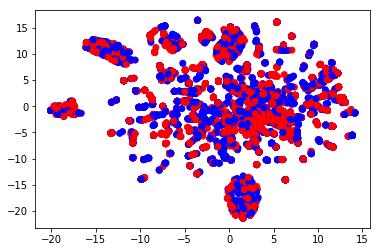

In [29]:
colors = {'FAKE':'red','REAL':'blue'}
plt.scatter(tsne[:,0],tsne[:,1],c=df['label'].apply(lambda x: colors[x]))

## Analyze similarity of headlines through word frequencies

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
titles_tfidf = tfidf_vectorizer.fit_transform(df['title'])
tfidf_df = pd.DataFrame(titles_tfidf.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,00pm,01,04,05,06,08,10,100,...,آمریکا,ارزی,القادمون,ایران,جنگ,سال,علیه,مطالعاتی,مورد,کدآمایی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
tsne_tfidf_model = TSNE(n_components=2, verbose=1, random_state=0)

In [35]:
tsne_tfidf = tsne_tfidf_model.fit_transform(tfidf_df)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6335
[t-SNE] Computed conditional probabilities for sample 2000 / 6335
[t-SNE] Computed conditional probabilities for sample 3000 / 6335
[t-SNE] Computed conditional probabilities for sample 4000 / 6335
[t-SNE] Computed conditional probabilities for sample 5000 / 6335
[t-SNE] Computed conditional probabilities for sample 6000 / 6335
[t-SNE] Computed conditional probabilities for sample 6335 / 6335
[t-SNE] Mean sigma: 0.471306
[t-SNE] KL divergence after 75 iterations with early exaggeration: 1.011454
[t-SNE] Error after 100 iterations: 1.011454


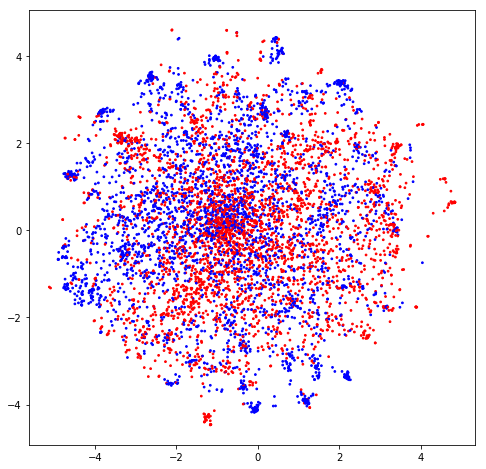

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_tfidf[:,0],tsne_tfidf[:,1],c=df['label'].apply(lambda x: colors[x]), s=3)

# 2. What are the words most associated with or targets of fake news? Could we generate additional features from this analysis to make a comparable classifier? 

# 3. Which encoding works better to classify fake news? TF-IDF or word2vec?